In [1]:
from google.colab import drive


FOLDERNAME = 'damaged_structures_detector/Social_Inequality_Data'

drive.mount('/content/drive', force_remount=True)

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
%%capture
!pip install pyxlsb
!pip install censusgeocode

In [0]:
%%capture
import os
from google.colab import drive
from pathlib import Path
import gdal 
import glob
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
import censusgeocode as cg

Load Inequality Data and get information for a particular County

In [0]:
# xls = pd.ExcelFile(os.path.join(FOLDERNAME, 'Big_Earth_Hack_data_yilin.xlsb'), engine='pyxlsb')
# df = pd.read_excel(xls, 'US_Tract_2014_Data')

In [0]:
# CountyOfInterest = 'Butte County'
# CountyData = df.loc[df['County'] == CountyOfInterest]

In [4]:
# len(CountyData.index)
CountyData = pd.read_csv('damaged_structures_detector/CountyData.csv', index_col=0)
CountyData
#CountyData.to_csv('damaged_structures_detector/CountyData.csv')

,GEOID,GISJOIN,Region,State,County,area_sqkm,E_TOTPOP,EP_POV,EP_UNEMP,EP_NOHSDP,EP_PCI,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,M_TOTPOP,MP_POV,MP_UNEMP,MP_NOHSDP,MP_PCI,MP_AGE65,MP_AGE17,MP_DISABL,MP_SNGPNT,MP_LIMENG,MP_MUNIT,MP_MOBILE,MP_CROWD,MP_NOVEH,MP_GROUPQ,WHP_avg,vuln,adapt_index,white,black,amerindn,asian,pacisland,hispanic,other,mixed
10232,6007001000,G0600070001000,West,California,Butte County,2.473774,4955.0,37.1,14.6,5.1,18344.0,4.8,9.1,7.5,6.8,0.4,11.4,0.9,1.6,6.6,7.0,700.0,8.3,8.2,3.2,3105.0,1.1,3.1,2.6,4.3,1.5,5.1,0.9,1.7,4.1,1.1,0.000000,0.681800,0.6818,0.846699,0.012914,0.010414,0.015622,0.001041,0.157051,0.069569,0.043741
12662,6007000300,G0600070000300,West,California,Butte County,2.498776,4696.0,24.2,9.6,13.1,20742.0,14.6,24.6,18.4,12.9,4.1,17.5,13.1,5.7,14.6,12.7,427.0,8.5,4.5,3.6,3043.0,2.9,6.2,4.7,5.8,2.1,6.2,4.5,3.9,5.1,5.2,0.062500,0.810696,0.8106,0.786848,0.027211,0.018594,0.036054,0.003175,0.184580,0.075964,0.052154
14053,6007000202,G0600070000202,West,California,Butte County,1.716920,3368.0,21.2,8.2,9.3,23878.0,21.8,18.2,22.9,10.0,2.8,13.0,26.4,0.0,11.0,0.3,381.0,6.6,3.4,3.3,3204.0,3.0,4.9,4.3,5.0,2.3,4.3,4.0,1.1,4.1,0.5,0.086957,0.620444,0.6202,0.812248,0.031158,0.024711,0.022025,0.001074,0.148268,0.053720,0.055063
17917,6007000604,G0600070000604,West,California,Butte County,1.016929,4353.0,59.8,20.5,9.7,13285.0,5.1,14.5,14.4,17.1,2.0,23.1,0.9,6.5,15.9,8.9,540.0,6.6,6.3,5.1,2004.0,1.7,4.7,5.2,5.6,1.7,6.2,1.2,4.2,5.7,3.0,0.153846,0.917016,0.9165,0.699549,0.047901,0.009485,0.091297,0.003320,0.188997,0.085132,0.063315
21470,6007000104,G0600070000104,West,California,Butte County,2.551614,5845.0,16.8,12.6,13.4,22073.0,12.9,23.6,9.3,12.6,3.7,23.6,0.0,3.0,15.5,0.7,431.0,6.6,4.6,6.8,2552.0,2.7,4.4,3.6,6.2,2.7,6.6,1.4,3.6,6.5,0.3,0.216216,0.675186,0.6738,0.772889,0.019695,0.012598,0.057133,0.001065,0.168737,0.080908,0.055713
21971,6007002800,G0600070002800,West,California,Butte County,4.274015,4164.0,33.3,20.4,19.4,13697.0,11.6,29.6,22.8,17.9,3.1,18.3,2.7,4.2,22.0,1.4,405.0,7.9,7.0,6.1,1668.0,2.6,5.2,4.7,6.9,2.2,5.8,1.3,2.8,5.9,1.6,0.224138,0.977528,0.9765,0.772865,0.030175,0.039766,0.041170,0.003275,0.133801,0.038596,0.074152
22497,6007000502,G0600070000502,West,California,Butte County,1.145108,3965.0,58.4,14.1,3.7,15707.0,3.5,14.1,12.7,9.9,1.0,38.2,1.0,1.0,9.9,0.0,447.0,10.2,4.9,3.0,2925.0,1.6,4.8,5.0,5.2,1.6,7.9,1.1,1.3,5.2,0.3,0.235294,0.759060,0.7576,0.703616,0.037821,0.008563,0.094434,0.006185,0.176736,0.091579,0.057802
26425,6007000601,G0600070000601,West,California,Butte County,1.807985,3488.0,12.2,4.6,4.7,29586.0,11.7,21.6,9.2,5.6,0.6,2.0,0.0,0.8,3.3,0.0,284.0,5.5,3.1,3.7,3144.0,2.0,3.9,3.5,4.6,1.6,2.4,2.5,1.2,2.3,0.3,0.307692,0.250962,0.2433,0.858354,0.008777,0.017554,0.029358,0.002119,0.122276,0.042070,0.041768
29285,6007000102,G0600070000102,West,California,Butte County,2.659214,3998.0,15.4,9.1,12.9,25859.0,18.7,24.0,14.2,10.9,2.7,6.3,11.6,1.6,7.4,0.6,378.0,7.1,4.3,5.3,3859.0,2.8,3.5,3.8,4.8,2.5,4.3,3.5,1.7,4.1,0.4,0.363636,0.576903,0.5723,0.850256,0.013077,0.011538,0.028718,0.001795,0.122051,0.045897,0.048718
29783,6007000603,G0600070000603,West,California,Butte County,1.107965,3396.0,50.0,17.6,6.0,13673.0,4.6,5.5,10.1,5.3,0.8,23.8,0.5,1.1,4.5,32.6,440.0,9.0,7.7,4.6,2037.0,2.0,2.6,3.1,4.5,1.7,7.4,0.8,2.0,2.5,6.8,0.375000,0.795941,0.7924,0.857188,0.019169,0.007987,0.019169,0.002236,0.122045,0.032268,0.061981


Append GEOID column to model's output dataframe

In [6]:
ModelOutput = pd.read_csv('damaged_structures_detector/ModelOutput_Paradise.csv', index_col=0)
ModelOutput

,image,damage,longitude,latitude,address,GEOID
index,,,,,,
0,-1215625551_397356668.jpg,1,-121.562555,39.735667,"Lake Oroville State Recreation Area, Kelly Rid...",6007002401
1,-1215635802_397848825.jpg,1,-121.563580,39.784883,"2215 Dean Rd, Paradise, CA, 95969, USA",6007001900
2,-1215656522_397293294.jpg,1,-121.565652,39.729329,"95969, Paradise, CA, USA",6007002300
3,-1215656705_397294935.jpg,1,-121.565670,39.729493,"95969, Paradise, CA, USA",6007002300
4,-1215657097_397297998.jpg,1,-121.565710,39.729800,"95969, Paradise, CA, USA",6007002300
...,...,...,...,...,...,...
11375,-1216495138_397388075.jpg,1,-121.649514,39.738808,"132 Coast Range Ln, Paradise, CA, 95969, USA",6007002200
11376,-1216495410_397449165.jpg,0,-121.649541,39.744917,"4744 Skyway, Paradise, CA, 95969, USA",6007002200
11377,-1216496328_397452590.jpg,1,-121.649633,39.745259,"Paradise Countertops, 4742 Skyway, Paradise, C...",6007002200


In [0]:
# for index, row in ModelOutput.iterrows():
#     x = row['longitude']
#     y = row['latitude']
#     try:
#       ModelOutput['GEOID'][index] = int(cg.coordinates(x, y)['Census Tracts'][0]['GEOID'][1:])
#     except:
#       pass 
#     print(index, ' / 11379')

In [0]:
# ModelOutput['GEOID'] = ModelOutput['GEOID'].astype(int)
# ModelOutput = pd.read_csv('damaged_structures_detector/ModelOutput.csv', index_col=0)
# ModelOutput.to_csv('damaged_structures_detector/ModelOutput.csv')
# ModelOutput

Create the GEOID dictionary

In [9]:
GEOIDs = ModelOutput.GEOID.unique()
GEOIDs = np.delete(GEOIDs, np.where(GEOIDs == 0))
GEOIDs_dic = {}

for i in GEOIDs:
  GEOIDs_dic[str(i)] = [0, 0]

for index, row in ModelOutput.iterrows():
  geo_loc = row['GEOID']

  if str(geo_loc) in GEOIDs_dic.keys():
    if row['damage'] == 1:
      GEOIDs_dic[str(geo_loc)][1] += 1
    else:
      GEOIDs_dic[str(geo_loc)][0] += 1

GEOIDs_dic

{'6007001702': [12, 56],
 '6007001800': [255, 1630],
 '6007001900': [214, 1261],
 '6007002000': [307, 1831],
 '6007002100': [347, 1173],
 '6007002200': [289, 1504],
 '6007002300': [196, 1656],
 '6007002401': [0, 1]}

In [10]:
len(GEOIDs)

8

Racial Stats

In [0]:
# Racial_Stats = pd.DataFrame({'Native Am Houses Destr': [0], 'Total Native Am Houses': [0], 'Black Houses Destr': [0], 'Total Black Houses': [0],
#                              'Hispanic Houses Destr': [0], 'Total Hispanic Houses': [0], 'Asian Houses Destr': [0], 'Total Asian Houses': [0],
#                              'Mixed Houses Destr': [0], 'Total Mixed Houses': [0], 'White Houses Destr': [0], 'Total White Houses': [0]
#                           })

# for i in range(len(GEOIDs)):
  
#   if GEOIDs[i] in CountyData['GEOID'].values:

#     Racial_Stats['Native Am Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['amerindn'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total Native Am Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['amerindn'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Racial_Stats['Black Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['black'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total Black Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['black'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Racial_Stats['Hispanic Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['hispanic'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total Hispanic Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['hispanic'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Racial_Stats['Asian Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['asian'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total Asian Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['asian'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Racial_Stats['Mixed Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['mixed'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total Mixed Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['mixed'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Racial_Stats['White Houses Destr']     += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['white'].values * GEOIDs_dic[str(GEOIDs[i])][1]
#     Racial_Stats['Total White Houses'] += CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['white'].values * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

In [11]:
Racial_Stats = pd.read_csv('damaged_structures_detector/Social_Inequality_Data/Racial_Stats.csv', index_col=0)
#Racial_Stats.to_csv('damaged_structures_detector/Social_Inequality_Data/Racial_Stats.csv')
Racial_Stats

,Native Am Houses Destr,Total Native Am Houses,Black Houses Destr,Total Black Houses,Hispanic Houses Destr,Total Hispanic Houses,Asian Houses Destr,Total Asian Houses,Mixed Houses Destr,Total Mixed Houses,White Houses Destr,Total White Houses
0,109.313343,129.063915,38.179298,45.500683,629.414527,744.160393,116.410199,137.412748,313.588603,370.211264,8377.455375,9865.062458


Plot Graph

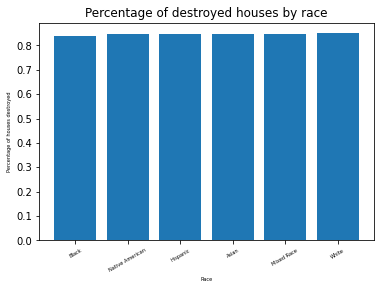

In [0]:
x = np.zeros((1, 6))
x[0,0] = Racial_Stats['Black Houses Destr'].values / Racial_Stats['Total Black Houses'].values

x[0,1] = Racial_Stats['Native Am Houses Destr'].values / Racial_Stats['Total Native Am Houses'].values

x[0,2] = Racial_Stats['Hispanic Houses Destr'].values / Racial_Stats['Total Hispanic Houses'].values

x[0,3] = Racial_Stats['Asian Houses Destr'].values / Racial_Stats['Total Asian Houses'].values

x[0,4] = Racial_Stats['Mixed Houses Destr'].values / Racial_Stats['Total Mixed Houses'].values

x[0,5] = Racial_Stats['White Houses Destr'].values / Racial_Stats['Total White Houses'].values


label = ['Black', 'Native American', 'Hispanic', 'Asian', 'Mixed Race', 'White']
percentages = [
    x[0,0],
    x[0,1],
    x[0,2],
    x[0,3],
    x[0,4],
    x[0,5],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Race', fontsize=5)
    plt.ylabel('Percentage of houses destroyed', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Percentage of destroyed houses by race')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/Race.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

Income Stats

In [0]:
# Poverty_Stats = pd.DataFrame({'Poor Houses Destr': [0], 'Total Poor Houses': [0], 'Rich Houses Destr': [0], 'Total Rich Houses': [0]})

# for i in range(len(GEOIDs)):

#   if GEOIDs[i] in CountyData['GEOID'].values:
#     poor_people = CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['EP_POV'].values /100
#     rich_people = 1 - poor_people
#     Poverty_Stats['Poor Houses Destr']  += poor_people * GEOIDs_dic[str(GEOIDs[i])][1]
#     Poverty_Stats['Total Poor Houses']  += poor_people * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Poverty_Stats['Rich Houses Destr']  += rich_people * GEOIDs_dic[str(GEOIDs[i])][1]
#     Poverty_Stats['Total Rich Houses']  += rich_people * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

In [12]:
Poverty_Stats = pd.read_csv('damaged_structures_detector/Social_Inequality_Data/Poverty_Stats.csv', index_col=0)
#Poverty_Stats.to_csv('damaged_structures_detector/Social_Inequality_Data/Poverty_Stats.csv')
Poverty_Stats

,Poor Houses Destr,Total Poor Houses,Rich Houses Destr,Total Rich Houses
0,1624.574,1908.781,7486.426,8822.219


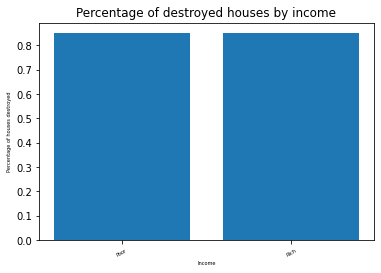

In [16]:
x = np.zeros((1, 2))

x[0,0] = Poverty_Stats['Poor Houses Destr'].values / Poverty_Stats['Total Poor Houses'].values
x[0,1] = Poverty_Stats['Rich Houses Destr'].values / Poverty_Stats['Total Rich Houses'].values

label = ['Poor', 'Rich']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Income', fontsize=5)
    plt.ylabel('Percentage of houses destroyed', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Percentage of destroyed houses by income')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/Income.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

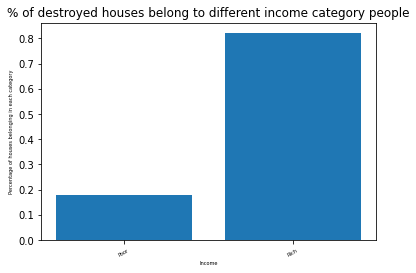

In [17]:
x = np.zeros((1, 2))

x[0,0] = Poverty_Stats['Poor Houses Destr'].values / (Poverty_Stats['Poor Houses Destr'].values + Poverty_Stats['Rich Houses Destr'].values)
x[0,1] = Poverty_Stats['Rich Houses Destr'].values / (Poverty_Stats['Poor Houses Destr'].values + Poverty_Stats['Rich Houses Destr'].values)

label = ['Poor', 'Rich']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Income', fontsize=5)
    plt.ylabel('Percentage of houses belonging in each category', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('% of destroyed houses belong to different income category people')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/Income2.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

Language

In [0]:
# Language_Stats = pd.DataFrame({'Non Eng Speaker Houses Destr': [0], 'Total Non Eng Speaker Houses': [0], 'Eng Speaker Houses Destr': [0], 'Total Eng Speaker Houses': [0]})

# for i in range(len(GEOIDs)):

#   if GEOIDs[i] in CountyData['GEOID'].values:
#     non_eng_sp = CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['EP_LIMENG'].values / 100
#     eng_sp = 1 - non_eng_sp

#     Language_Stats['Non Eng Speaker Houses Destr']  += non_eng_sp * GEOIDs_dic[str(GEOIDs[i])][1]
#     Language_Stats['Total Non Eng Speaker Houses']  += non_eng_sp * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

#     Language_Stats['Eng Speaker Houses Destr']  += eng_sp * GEOIDs_dic[str(GEOIDs[i])][1]
#     Language_Stats['Total Eng Speaker Houses']  += eng_sp * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

In [18]:
Language_Stats = pd.read_csv('damaged_structures_detector/Social_Inequality_Data/Language_Stats.csv', index_col=0)
#Language_Stats.to_csv('damaged_structures_detector/Social_Inequality_Data/Language_Stats.csv')
Language_Stats

,Non Eng Speaker Houses Destr,Total Non Eng Speaker Houses,Eng Speaker Houses Destr,Total Eng Speaker Houses
0,63.683,73.204,9047.317,10657.796


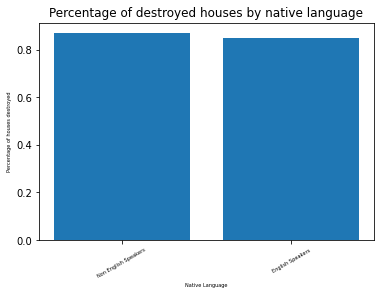

In [20]:
x = np.zeros((1, 2))

x[0,0] = Language_Stats['Non Eng Speaker Houses Destr'].values / Language_Stats['Total Non Eng Speaker Houses'].values
x[0,1] = Language_Stats['Eng Speaker Houses Destr'].values / Language_Stats['Total Eng Speaker Houses'].values

label = ['Non English Speakers', 'English Speakers']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Native Language', fontsize=5)
    plt.ylabel('Percentage of houses destroyed', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Percentage of destroyed houses by native language')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/Language.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

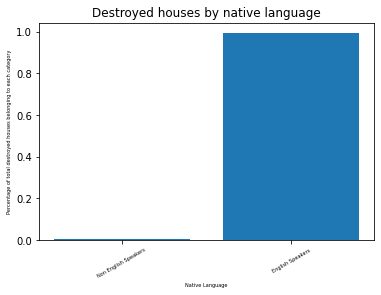

In [19]:
x = np.zeros((1, 2))

x[0,0] = Language_Stats['Non Eng Speaker Houses Destr'].values / (Language_Stats['Non Eng Speaker Houses Destr'].values + Language_Stats['Eng Speaker Houses Destr'].values)
x[0,1] = Language_Stats['Eng Speaker Houses Destr'].values / (Language_Stats['Non Eng Speaker Houses Destr'].values + Language_Stats['Eng Speaker Houses Destr'].values)

label = ['Non English Speakers', 'English Speakers']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Native Language', fontsize=5)
    plt.ylabel('Percentage of total destroyed houses belonging to each category', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Destroyed houses by native language')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/Language2.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

Age

In [0]:
Age_Stats = pd.DataFrame({'65_plus Houses Destr': [0], 'Total 65_plus Houses': [0], '65_min Houses Destr': [0], 'Total 65_min Houses': [0]})

for i in range(len(GEOIDs)):

  if GEOIDs[i] in CountyData['GEOID'].values:
    plus_65 = CountyData.loc[CountyData['GEOID'] == GEOIDs[i]]['EP_AGE65'].values / 100
    min_65 = 1 - plus_65

    Age_Stats['65_plus Houses Destr']  += plus_65 * GEOIDs_dic[str(GEOIDs[i])][1]
    Age_Stats['Total 65_plus Houses']  += plus_65 * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

    Age_Stats['65_min Houses Destr']  += min_65 * GEOIDs_dic[str(GEOIDs[i])][1]
    Age_Stats['Total 65_min Houses']  += min_65 * (GEOIDs_dic[str(GEOIDs[i])][0] + GEOIDs_dic[str(GEOIDs[i])][1])

In [23]:
#LanguaAge_Statsge_Stats = pd.read_csv('damaged_structures_detector/Social_Inequality_Data/Age_Stats.csv', index_col=0)
Age_Stats.to_csv('damaged_structures_detector/Social_Inequality_Data/Age_Stats.csv')
Age_Stats

,65_plus Houses Destr,Total 65_plus Houses,65_min Houses Destr,Total 65_min Houses
0,2316.971,2719.821,6794.029,8011.179


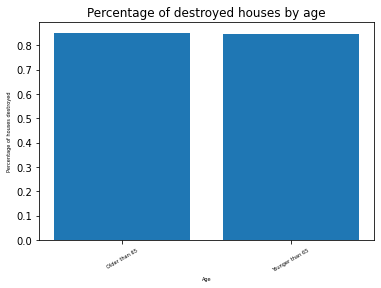

In [24]:
x = np.zeros((1, 2))

x[0,0] = Age_Stats['65_plus Houses Destr'].values / Age_Stats['Total 65_plus Houses'].values
x[0,1] = Age_Stats['65_min Houses Destr'].values / Age_Stats['Total 65_min Houses'].values

label = ['Older than 65', 'Younger than 65']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Age', fontsize=5)
    plt.ylabel('Percentage of houses destroyed', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Percentage of destroyed houses by age')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/age.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)

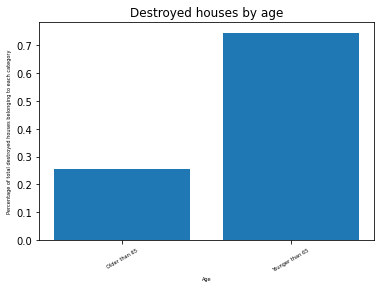

In [27]:
x = np.zeros((1, 2))

x[0,0] = Age_Stats['65_plus Houses Destr'].values / (Age_Stats['65_plus Houses Destr'].values + Age_Stats['65_min Houses Destr'].values)
x[0,1] = Age_Stats['65_min Houses Destr'].values / (Age_Stats['65_plus Houses Destr'].values + Age_Stats['65_min Houses Destr'].values)

label = ['Older than 65', 'Younger than 65']
percentages = [
    x[0,0],
    x[0,1],
]

def plot_bar_x(label, values):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Age', fontsize=5)
    plt.ylabel('Percentage of total destroyed houses belonging to each category', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Destroyed houses by age')
    plt.savefig('damaged_structures_detector/Social_Inequality_Data/age2.png', format='png', dpi=1200)
    plt.show()

plot_bar_x(label, percentages)